# 随机森林
## 集成学习
集成学习（ensemble learning）是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通 过在数据上构建多个模型，集成所有模型的建模结果。基本上所有的机器学习领域都可以看到集成学习的身影，在
现实中集成学习也有相当大的作用，它可以用来做市场营销模拟的建模，统计客户来源，保留和流失，也可用来预
测疾病的风险和病患者的易感性。在现在的各种算法竞赛中，随机森林，梯度提升树（GBDT），Xgboost 等集成 算法的身影也随处可见，可见其效果之好，应用之广。

多个模型集成成为的模型叫做集成评估器（ensemble estimator），组成集成评估器的每个模型都叫做基评估器
（base estimator）。通常来说，有三类集成算法：装袋法（Bagging），提升法（Boosting）和 stacking。

In [23]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

print("Sigle Tree:{}\n".format(score_c),
      "Random Forest:{}".format(score_r))

Sigle Tree:0.9629629629629629
 Random Forest:1.0


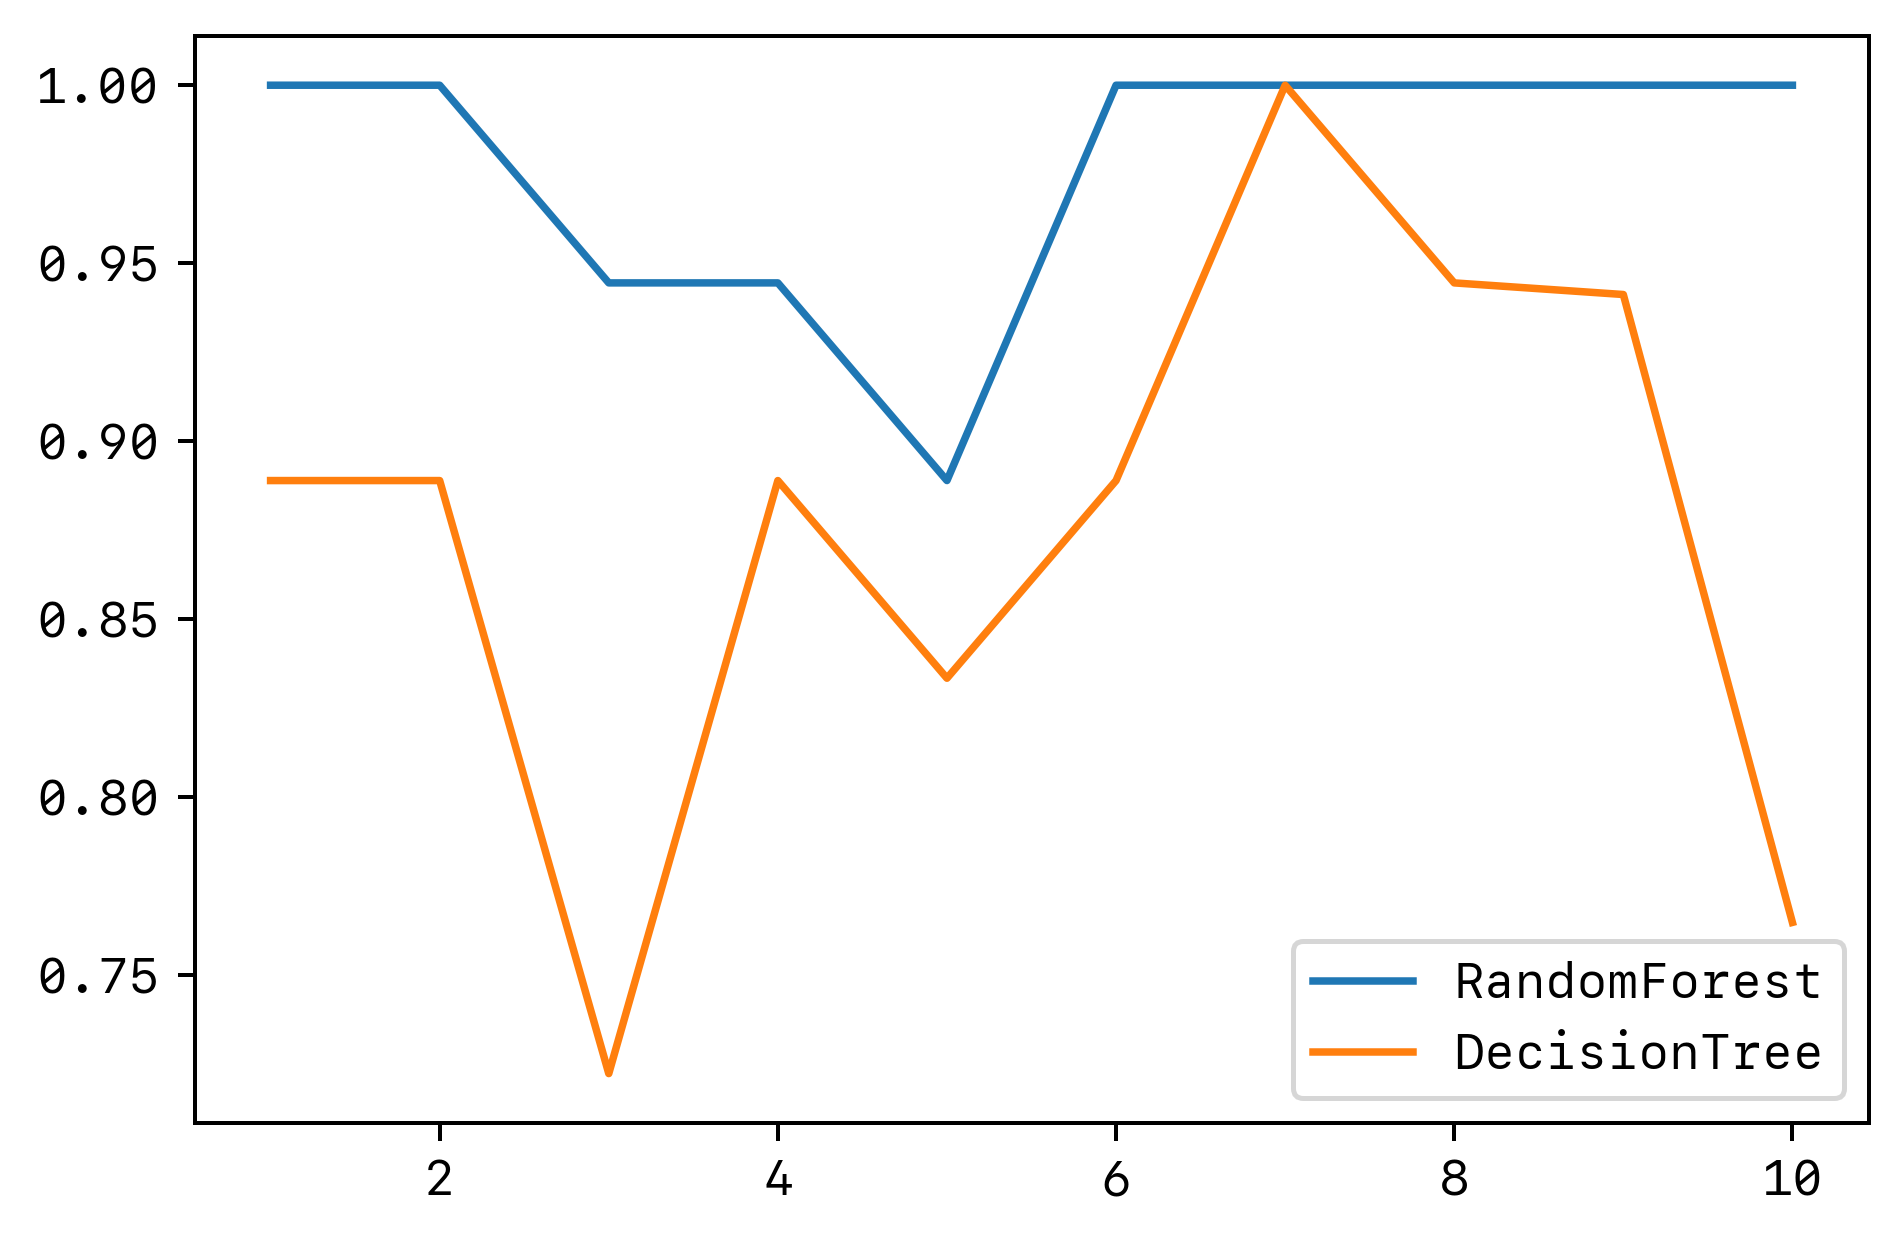

In [6]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), rfc_s, label="RandomForest")
plt.plot(range(1, 11), clf_s, label="DecisionTree")
plt.legend()
plt.show()

单个决策树的准确率越高，随机森林的准确率也会越高

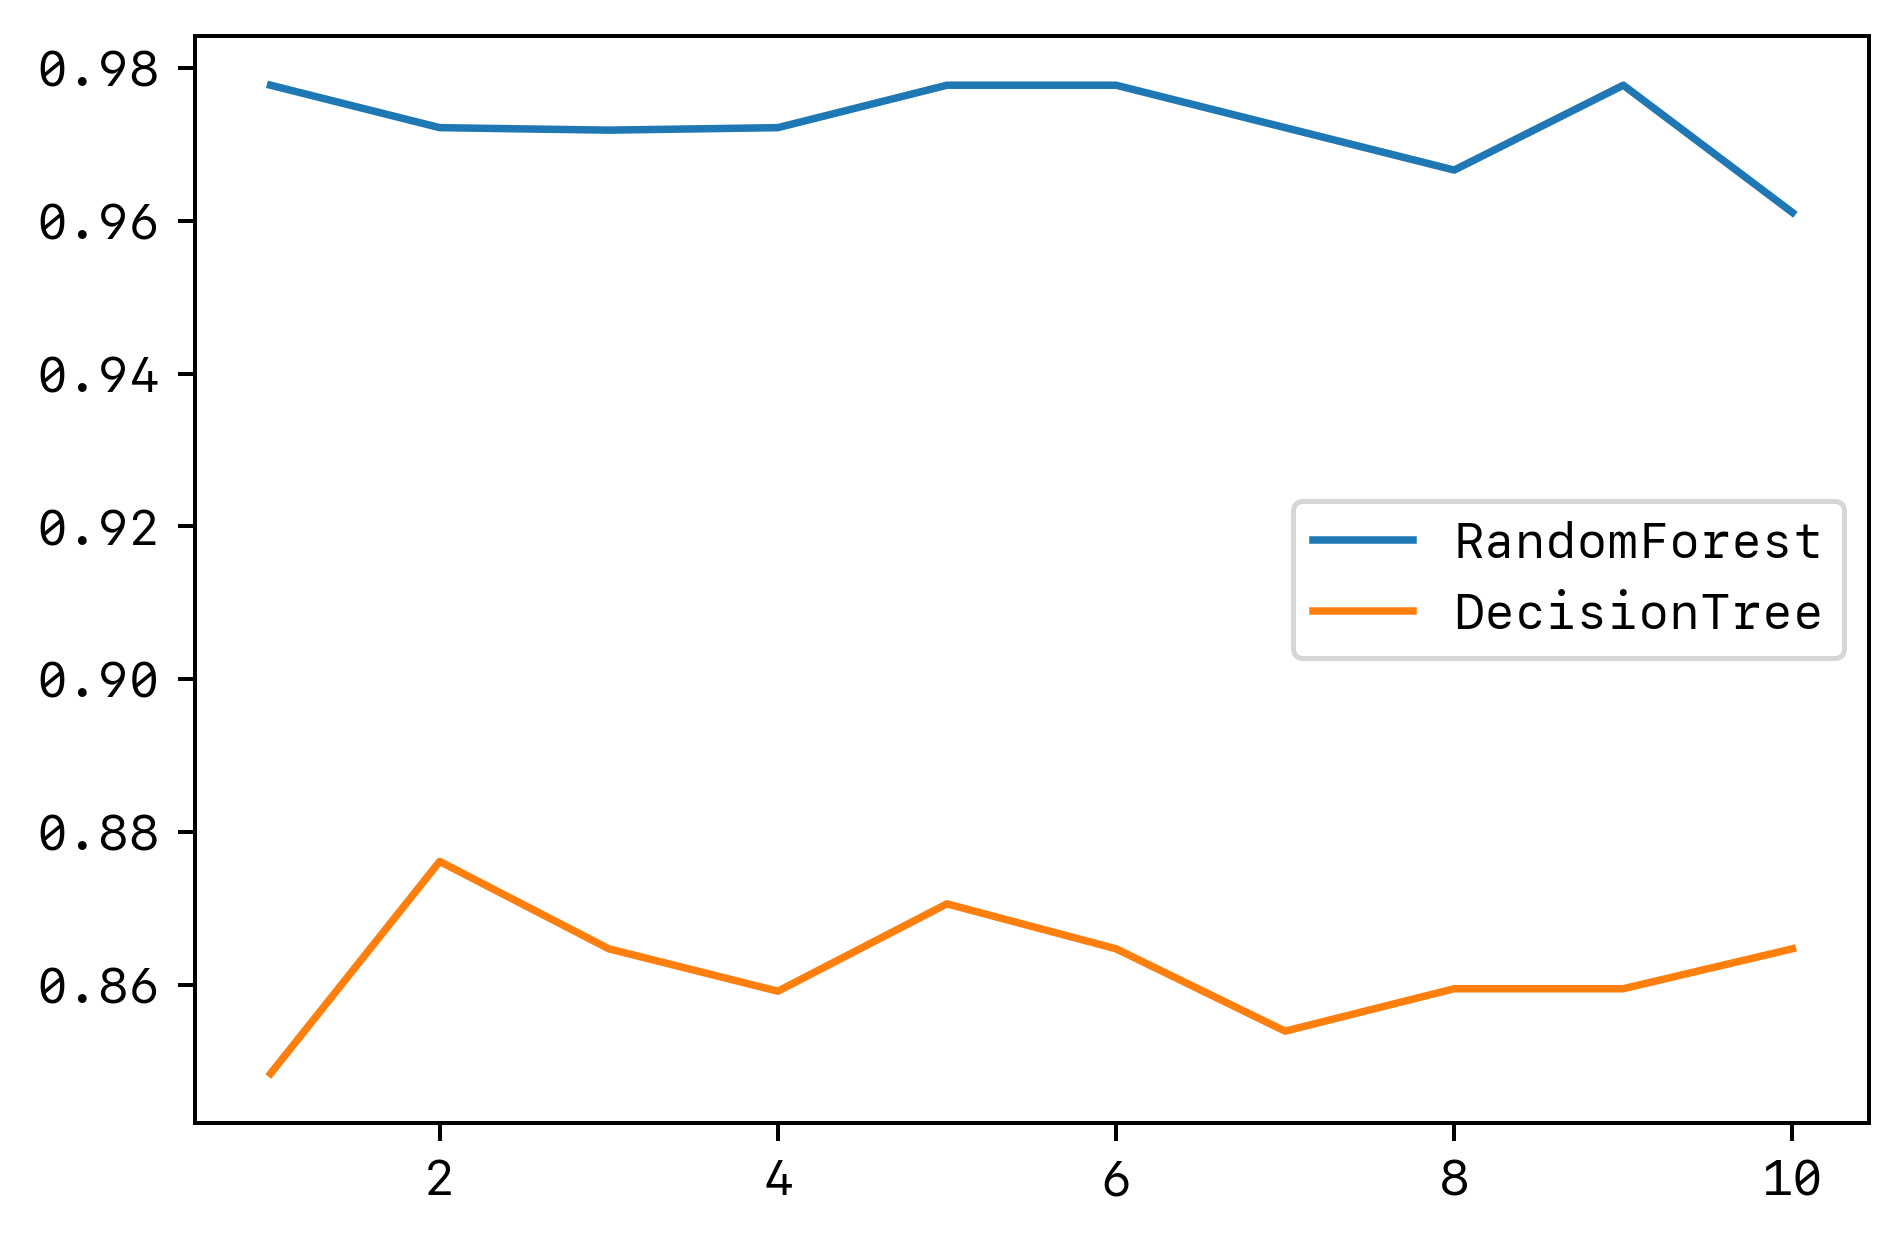

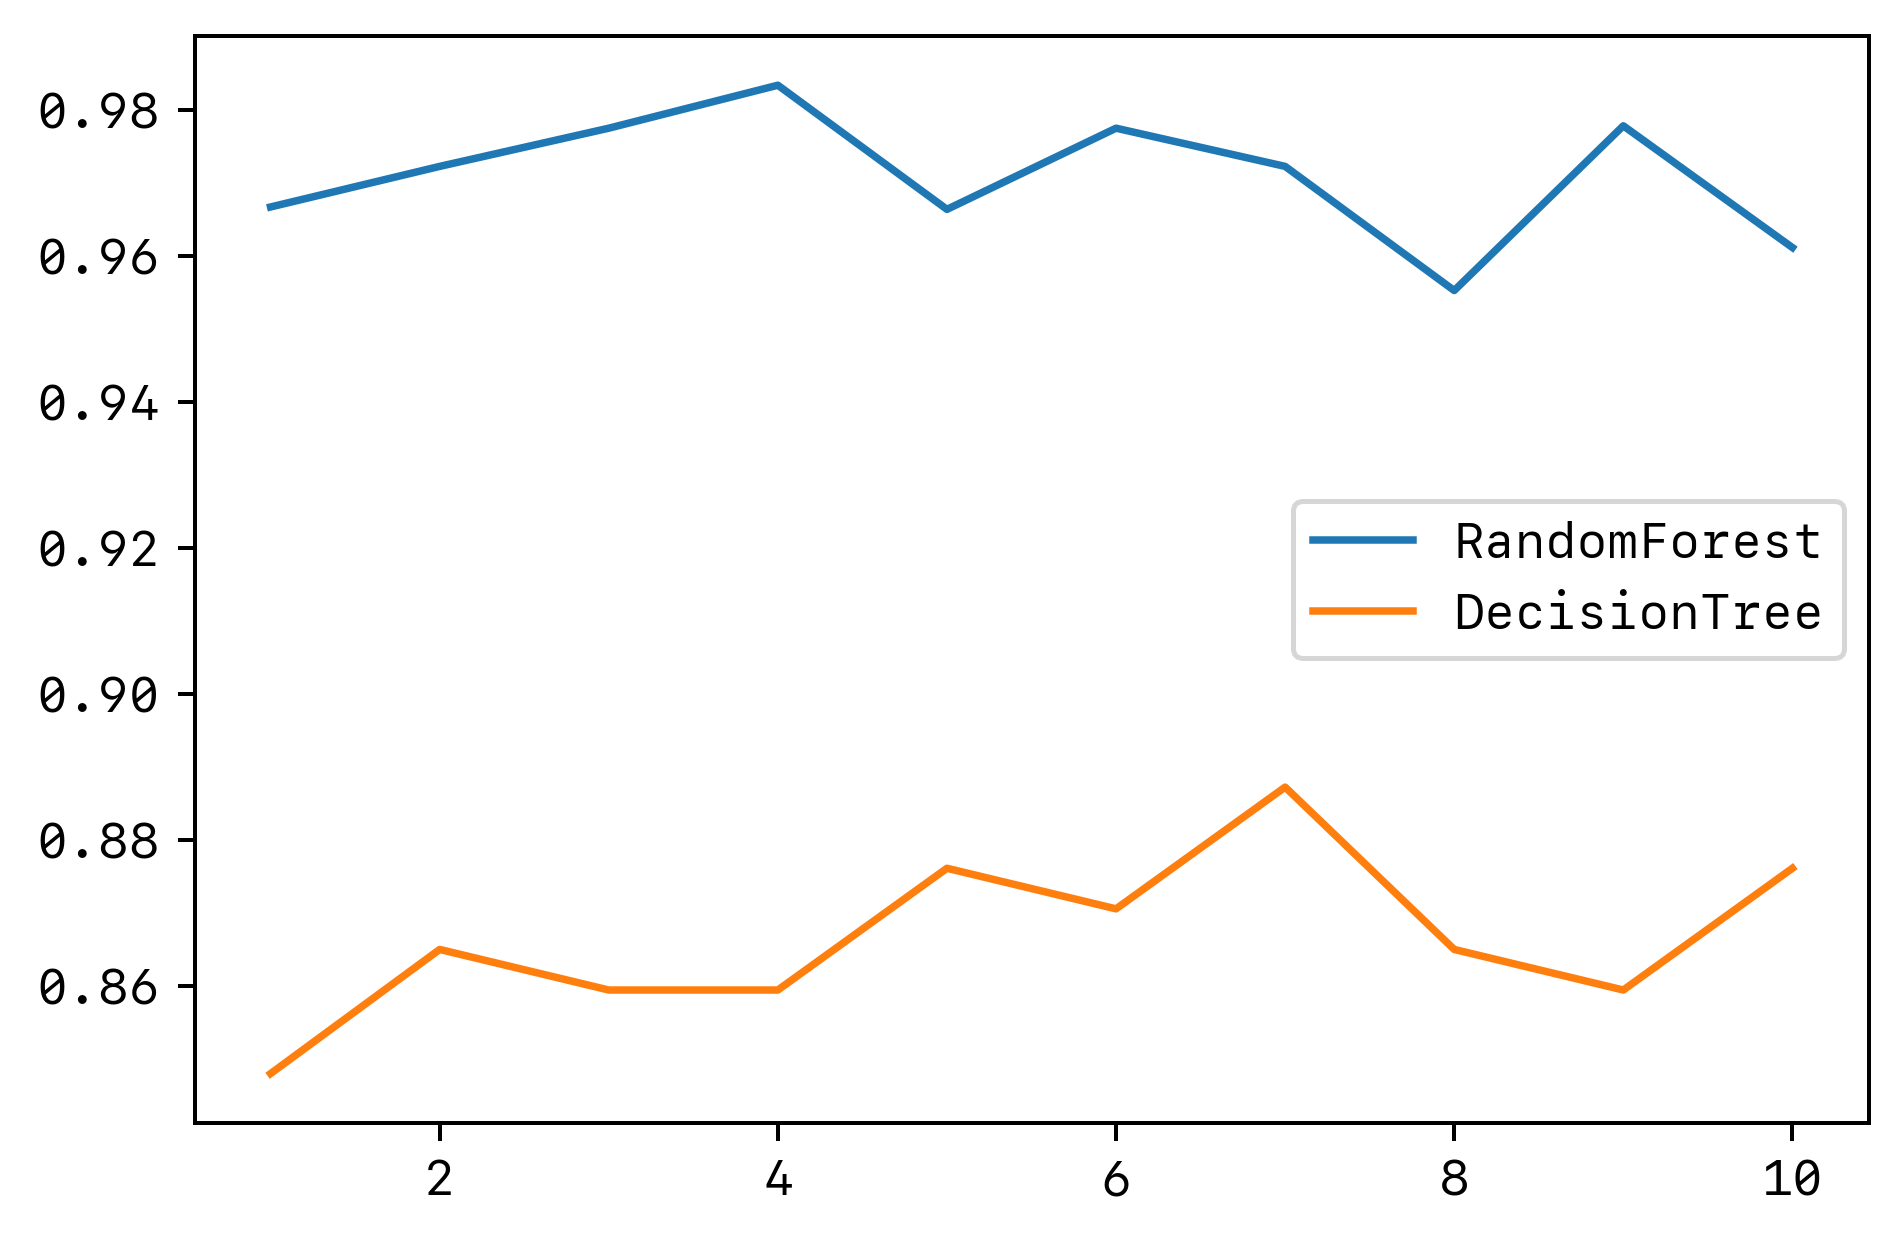

In [9]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)

plt.plot(range(1, 11), rfc_l, label="RandomForest")
plt.plot(range(1, 11), clf_l, label="DecisionTree")
plt.legend()
plt.show()

n_estimators 的学习曲线

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
epoch 50
epoch 51
epoch 52
epoch 53
epoch 54
epoch 55
epoch 56
epoch 57
epoch 58
epoch 59
epoch 60
epoch 61
epoch 62
epoch 63
epoch 64
epoch 65
epoch 66
epoch 67
epoch 68
epoch 69
epoch 70
epoch 71
epoch 72
epoch 73
epoch 74
epoch 75
epoch 76
epoch 77
epoch 78
epoch 79
epoch 80
epoch 81
epoch 82
epoch 83
epoch 84
epoch 85
epoch 86
epoch 87
epoch 88
epoch 89
epoch 90
epoch 91
epoch 92
epoch 93
epoch 94
epoch 95
epoch 96
epoch 97
epoch 98
epoch 99
epoch 100
0.9888888888888889 27


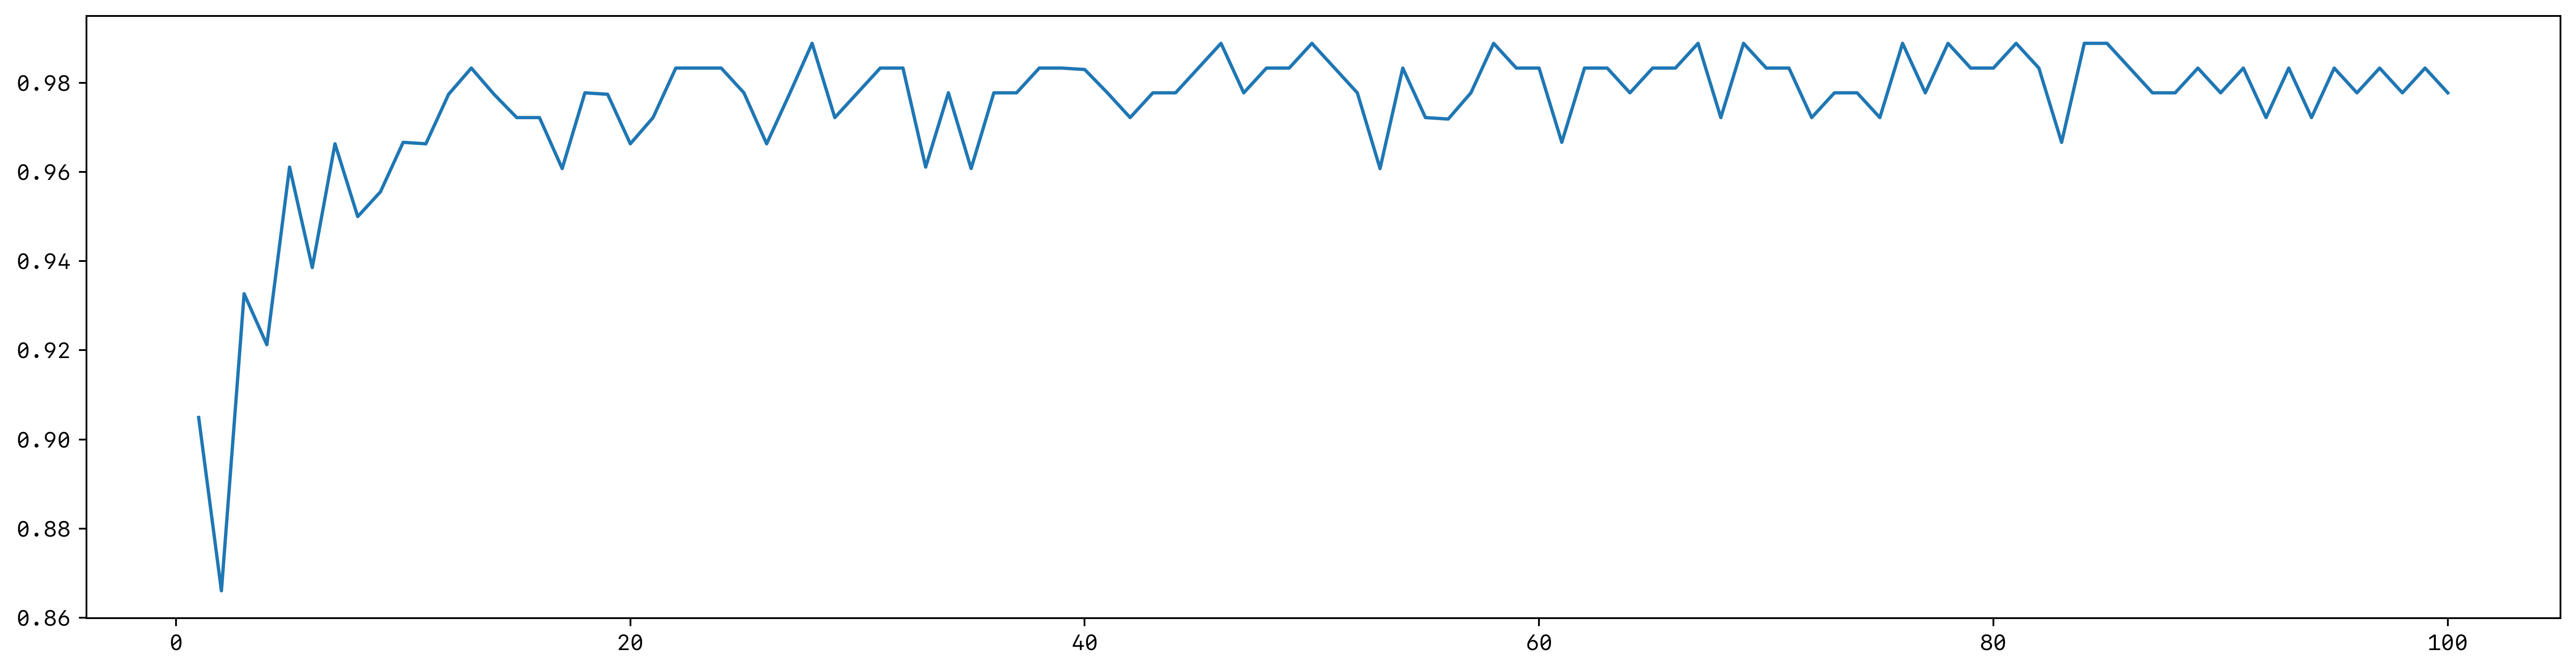

In [27]:
superpa = []
for i in range(100):
    print("epoch " + str(i + 1))
    rfc = RandomForestClassifier(n_estimators=i + 1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)

print(max(superpa), superpa.index(max(superpa)))
plt.figure(figsize=[20, 5])
plt.plot(range(1, 101), superpa)
plt.show()

随机森林的本质是一种装袋集成算法（bagging），装袋集成算法是对基评估器的预测结果进行平均或用多数表决 原则来决定集成评估器的结果。在刚才的红酒例子中，我们建立了 25 棵树，对任何一个样本而言，平均或多数表决原则下，当且仅当有 13 棵以上的树判断错误的时候，随机森林才会判断错误。

In [10]:
np.array([comb(25, i) * (0.2 ** i) * ((1 - 0.2) ** (25 - i)) for i in range(13, 26)]).sum()

0.00036904803455582827

可见，判断错误的几率非常小，这让随机森林在红酒数据集上的表现远远好于单棵决策树。

随机森林中其实也有 random_state，用法和分类树中相似，只不过在分类树中，一个 random_state 只控制生成一 棵树，而随机森林中的 random_state 控制的是生成森林的模式，而非让一个森林中只有一棵树。

In [11]:
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

#随机森林的重要属性之一：estimators，查看森林中树的状况
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


当 random_state 固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是 用”随机挑选特征进行分枝“的方法得到的随机性。并且我们可以证明，当这种随机性越大的时候，袋装法的效果一般会越来越好。用袋装法集成时，基分类器应当是相互独立的，是不相同的。

也就是说，在使用随机森林时，我们可以不划分测试集和训练集，只需要用袋外数据来测试我们的模型即可。如果希望用袋外数据来测试，则需要在实例化时就将 oob_score这个参数调整为True，训练完毕之后，我们可以用 随机森林的另一个重要属性：oob_score_来查看我们的在袋外数据上测试的结果：

In [16]:
# 无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

# 重要属性oob_score_
rfc.oob_score_

0.9719101123595506

In [18]:
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

print(rfc.feature_importances_)  # 每个特征的重要程度
print(rfc.apply(Xtest))  # 每个样本在每个树中的节点的索引
print(rfc.predict(Xtest))  # 样本点在每个结果的可能性
print(rfc.predict_proba(Xtest))  # 样本的平均概率

[0.08929175 0.01379007 0.00963803 0.0181008  0.05348097 0.07413879
 0.15345563 0.02097819 0.01256606 0.16633666 0.05608701 0.14310792
 0.18902812]
[[ 2 12 15 ...  6 17 16]
 [ 7 16 12 ... 12 17 13]
 [ 2 10  4 ...  6  6  2]
 ...
 [ 7 16 16 ... 18 17 13]
 [ 5  5  5 ... 19  4  3]
 [ 2  2  4 ...  6 12  2]]
[2 0 2 0 2 0 1 1 0 0 1 1 1 1 1 0 1 0 2 2 1 0 0 1 1 1 0 1 2 1 1 2 1 0 1 1 1
 1 0 0 0 1 2 2 1 2 1 2 2 2 1 0 1 2]
[[0.15 0.25 0.6 ]
 [0.65 0.3  0.05]
 [0.   0.15 0.85]
 [1.   0.   0.  ]
 [0.1  0.25 0.65]
 [0.9  0.1  0.  ]
 [0.25 0.65 0.1 ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.95 0.05 0.  ]
 [0.1  0.9  0.  ]
 [0.1  0.8  0.1 ]
 [0.05 0.95 0.  ]
 [0.25 0.75 0.  ]
 [0.   0.6  0.4 ]
 [0.95 0.05 0.  ]
 [0.05 0.5  0.45]
 [0.9  0.05 0.05]
 [0.05 0.   0.95]
 [0.   0.   1.  ]
 [0.3  0.65 0.05]
 [0.75 0.25 0.  ]
 [0.95 0.05 0.  ]
 [0.1  0.75 0.15]
 [0.05 0.8  0.15]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.15 0.8  0.05]
 [0.   0.05 0.95]
 [0.   1.   0.  ]
 [0.1  0.8  0.1 ]
 [0.05 0.15 0.8 ]
 [0.   0.9

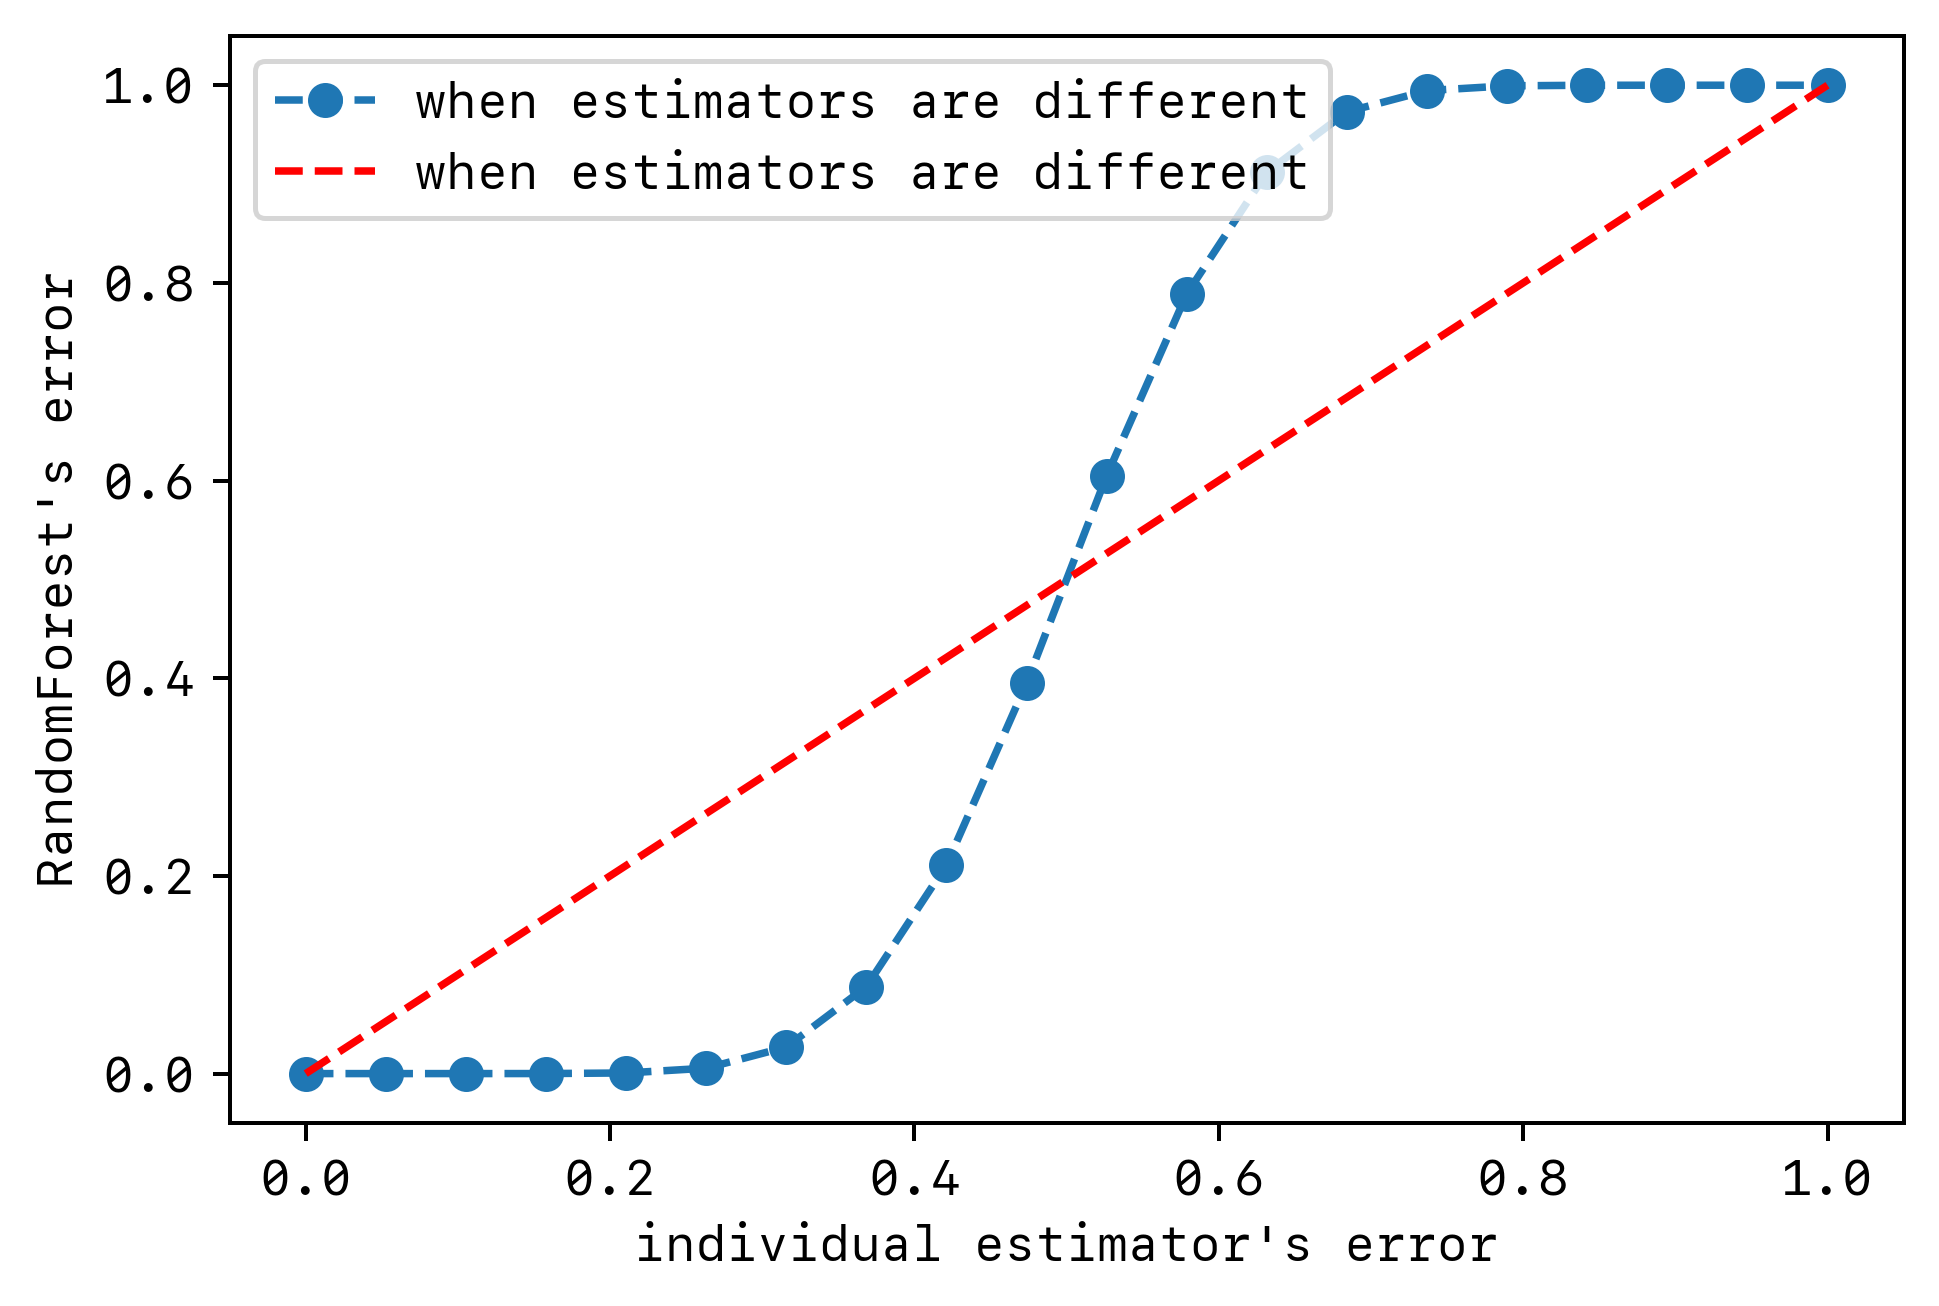

In [19]:
x = np.linspace(0, 1, 20)
y = []
for epsilon in np.linspace(0, 1, 20):
    E = np.array([comb(25, i) * (epsilon ** i) * ((1 - epsilon) ** (25 - i)) for i in range(13, 26)]).sum()
    y.append(E)

plt.plot(x, y, "o--", label="when estimators are different")
plt.plot(x, x, "--", color="red", label="when estimators are different")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()
# plt.savefig("bagging_condition",dpi=300)

当基分类器的误差率小于 0.5，即准确率大于 0.5 时，集成的效果是比基分类器要好的。相反，当基分类器的误差率大于 0.5，袋装的集成算法就失效了。所以在使用随机森林之前，一定要检查，用来组成随机森林的分类树们是否都有至少 50%的预测正确率。

## 回归森林

In [22]:
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring="neg_mean_squared_error")

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

返回十次交叉验证的结果，注意在这里，如果不填写 scoring = "neg_mean_squared_error"，交叉验证默认的模型衡量指标是 R 平方，因此交叉验证的结果可能有正也可能有负。而如果写上 scoring，则衡量标准是负 MSE，交叉验 证的结果只可能为负。

In [24]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we